# Importing necessary packages:

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
sns.set_style('ticks')
np.random.seed(100)

In [ ]:
df = pd.read_csv('/datasets_14872_228180_Admission_Predict_Ver1.1/datasets_14872_228180_Admission_Predict_Ver1.1.csv')

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
25%      3.00000    8.127500    0.000000           0.63000  
50%      3.50000    8.560000    1.000000           0.72000  
75%      4.00000    9.040000    1.000000           0.82000  
max      5.00000    9.920000    1.000000           0.97000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### We don't need the Serial No. column here. So, dropping it

In [ ]:
df = df.drop(['Serial No.'], axis= 1)
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

### Checking for Null values and duplicates

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


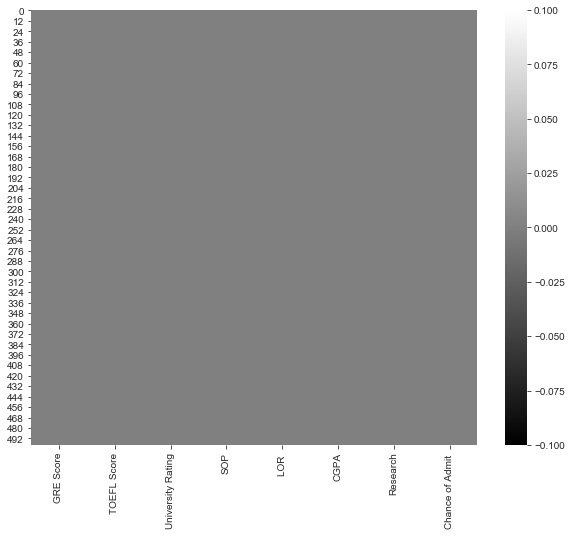

In [ ]:
print(df.isnull().sum())
plt.figure(figsize = (10,8))
sns.heatmap(df.isnull(),cmap ='gray')

In [ ]:
df.duplicated().sum()

0

No Null and Duplicate values...We are good to go

#  Let us do some EDA:

## Let us see what info we can get from pairplot...

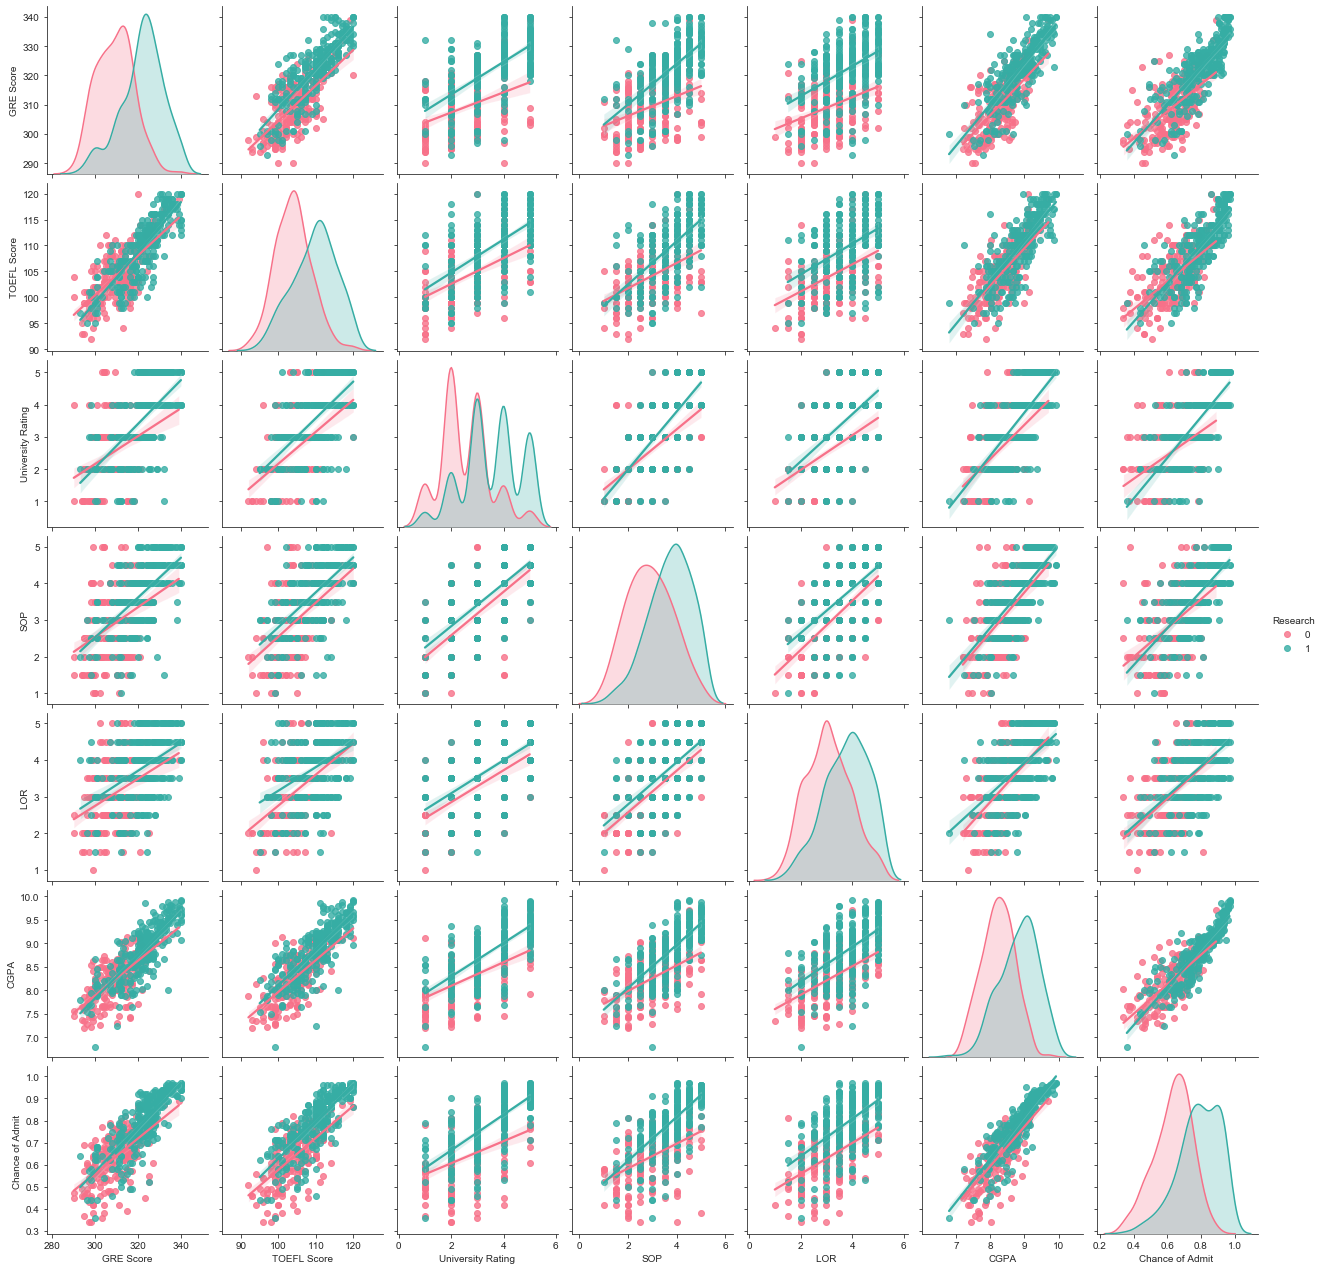

In [ ]:
sns.pairplot(df,kind='reg',hue="Research", palette="husl")

## It has been observed that:
1. Here we are using Linear Regressor, Ridge Regressor, Random Forest Regressor, XGBoost Regressor, Gradient Boosting Regressor, LightGBM Regressor and CatBoost Regressor, etc

 ## Let us see what info we can get from correlation of each columns, specifically with target (Chance of Admit)...

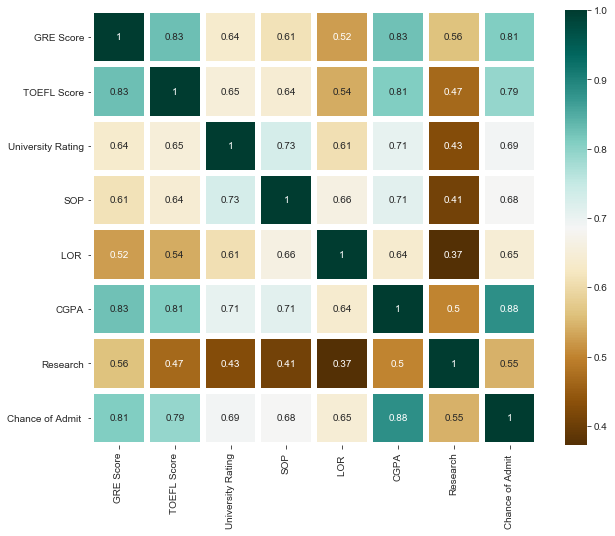

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap='BrBG', annot = True, linecolor = 'white', linewidth = 5)

In [ ]:
round(df.corrwith(df['Chance of Admit ']).sort_values(ascending = False)*100,2)

Chance of Admit      100.00
CGPA                  88.24
GRE Score             81.04
TOEFL Score           79.22
University Rating     69.01
SOP                   68.41
LOR                   64.54
Research              54.59
dtype: float64

## If we look at the last row of the heatmap, it is clear that:
1. The features "CGPA", "GRE Score" and "TOEFL Score" are highly correalted with the target "Chance of Admit"  while, "University Rating", "SOP", "LOR" and "Reasearch" are comparatively less correlated.
2. Feature "CGPA" has the highest correlation of 88.24%, while "Reasearch" has the lowest correlation of 54.59%.
3. It is good that each feature has more than 50% correlation with the target.

## Let us check for Outliers...

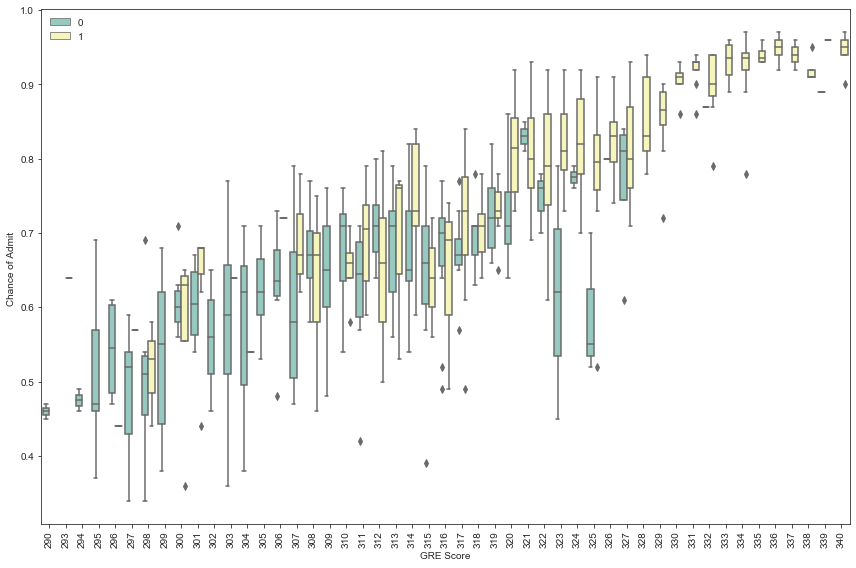

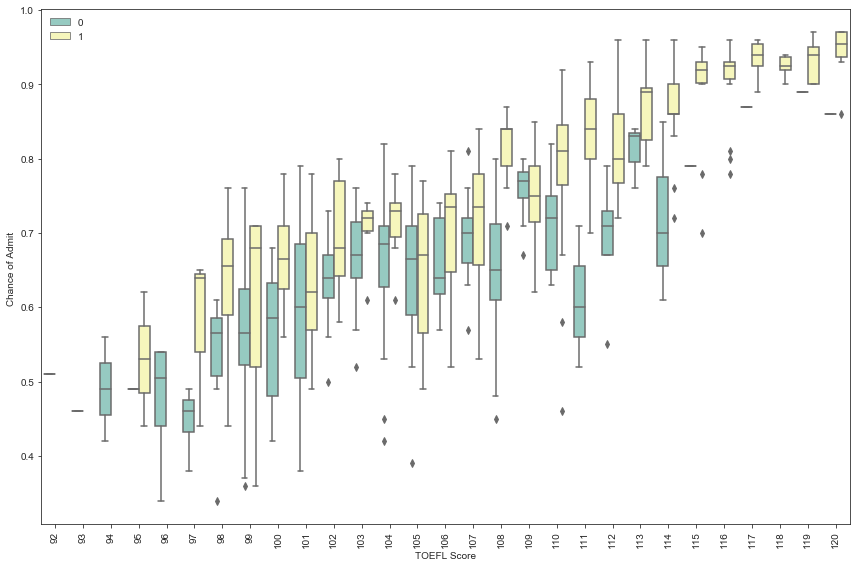

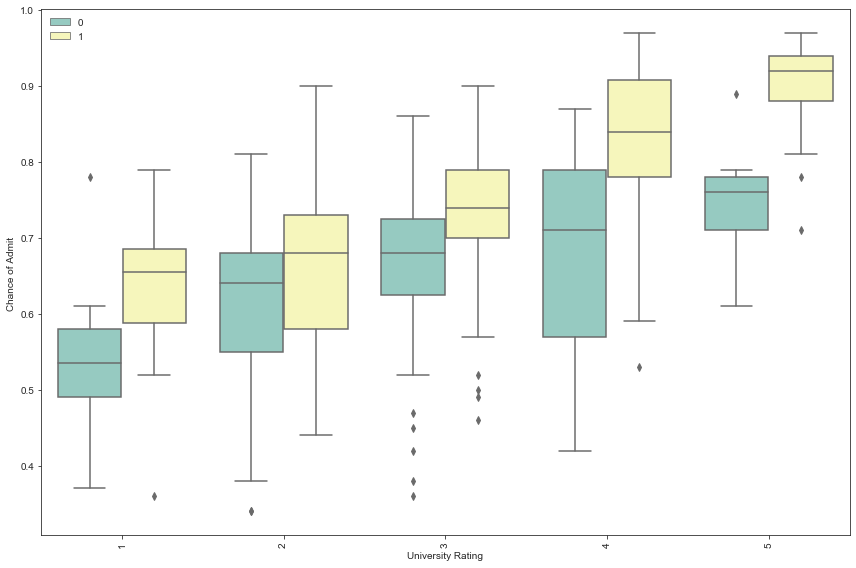

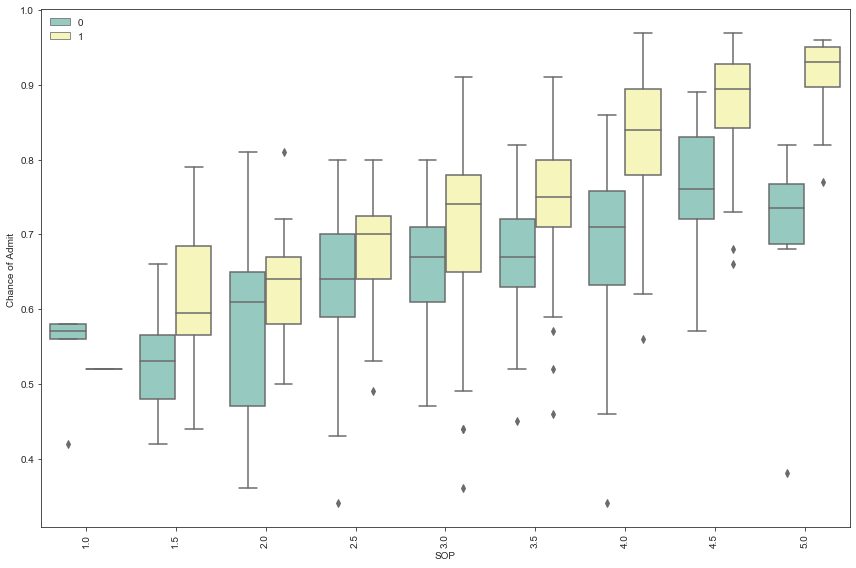

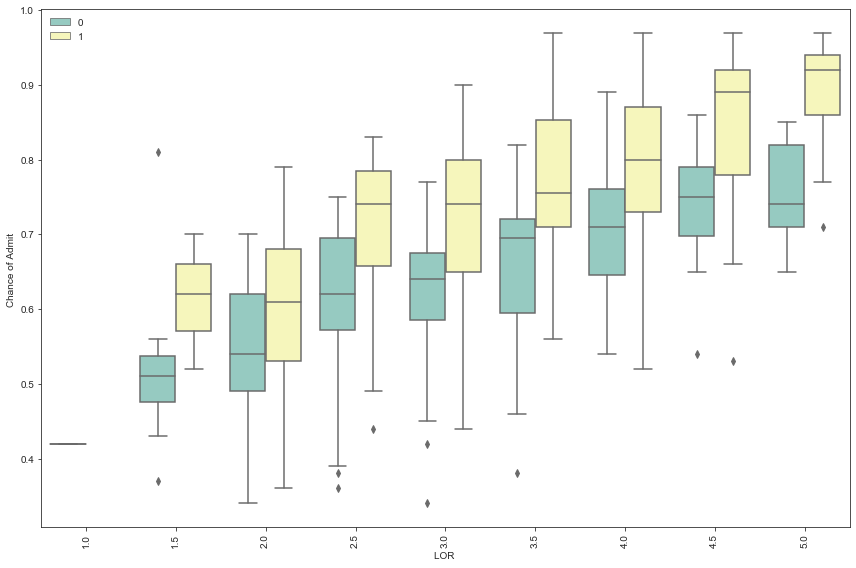

In [ ]:
for i in df.drop(['Chance of Admit ','Research','CGPA'],axis =1).columns:
    plt.figure(figsize = (12,8))
    ax = sns.boxplot(x = i,y = 'Chance of Admit ',data = df,palette = 'Set3', hue = 'Research')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.legend(frameon = False, loc = 'upper left')
    plt.show()

## Findings:
1. There are few outliers present in each features.
2. Also, we can easily notice that, the candidates applied for Research Opportunities are having having higher Chance of Admit.
3. We will have to use RobustScaler for feature scaling since, it penalizes outliers and it will least affect our prediction

## Let us discover outliers with some other way:
Measure of Shape(Skewness and Kurtosis)...

In [ ]:
df.skew()

GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

In [ ]:
df.kurt()

GRE Score           -0.711064
TOEFL Score         -0.653245
University Rating   -0.810080
SOP                 -0.705717
LOR                 -0.745749
CGPA                -0.561278
Research            -1.949018
Chance of Admit     -0.454682
dtype: float64

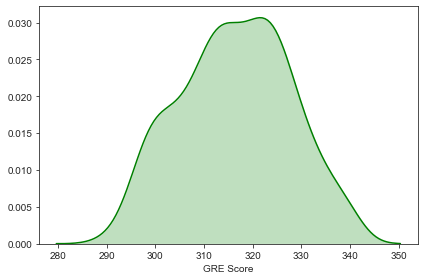

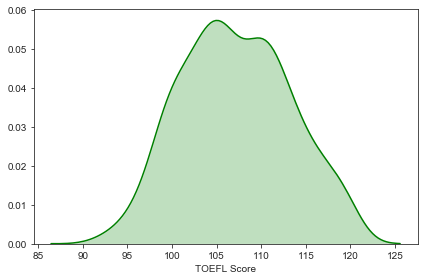

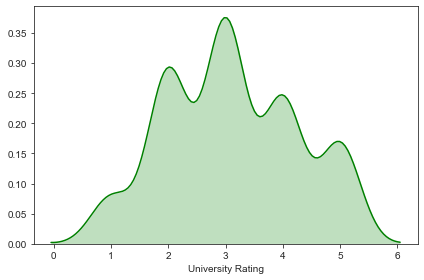

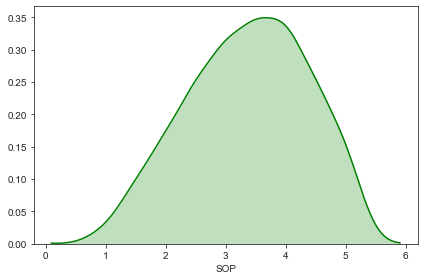

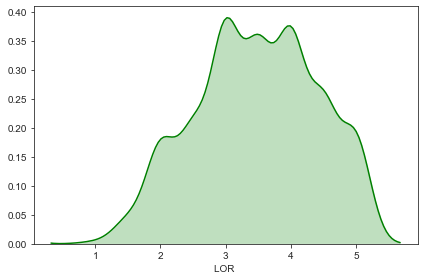

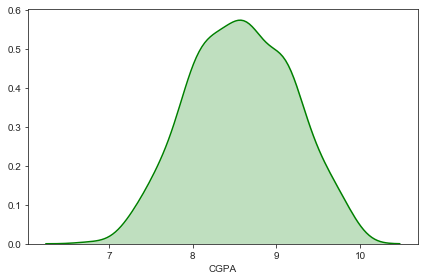

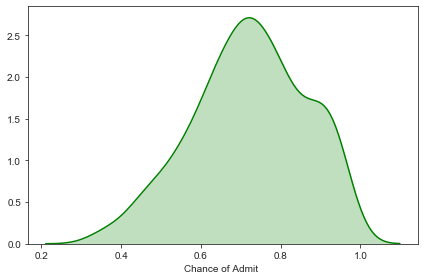

In [ ]:
for i in df.drop(['Research'],axis =1).columns:
    plt.figure(figsize =(6,4)) 
    sns.distplot(df[i], hist=False, color="green", kde = True,kde_kws={"shade": True})
    plt.tight_layout()
    plt.show()

## Findings:
### For Skewness...
1. Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution.
1. We can easily notice that the Skew coefficients of features is between -0.5 and 0.5, i.e., the data are fairly symmetrical.
3. Most of features are negatively skewed as most of the Skew coefficients are negative.

### For Kutosis...
1. Kurtosis is the measure of outliers present in the distribution
2. We can easily notice that the Kutosis coefficients of features is less than 3 (Platykurtic), i.e., Distribution is shorter, tails are thinner than the normal distribution.
3. All the features have negative Kutosis coefficients (excess kurtosis).

#### fyi
https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

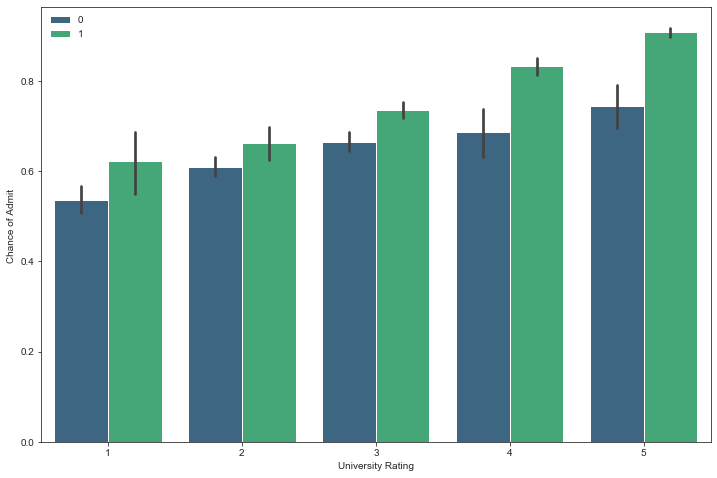

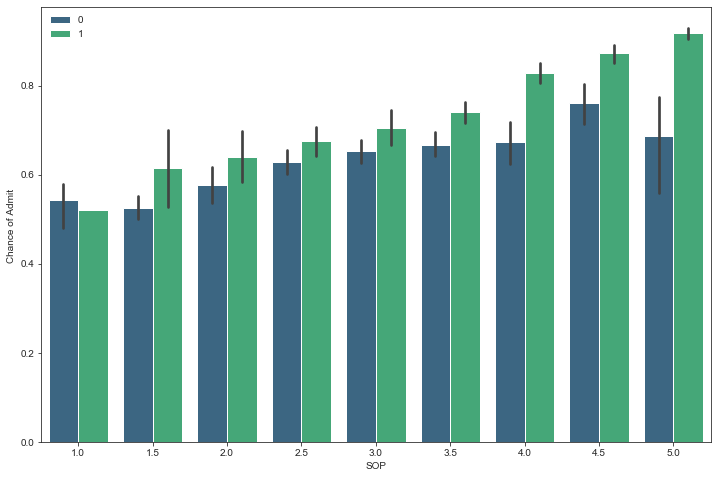

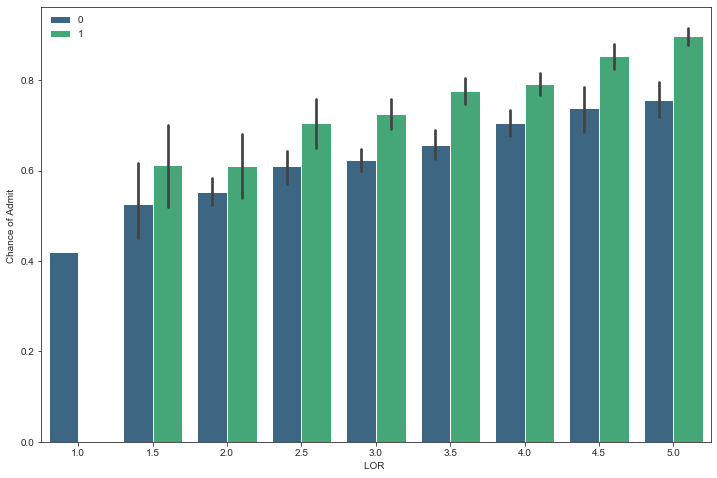

In [ ]:
for i in ['University Rating', 'SOP', 'LOR ']:
    plt.figure(figsize = (12,8))
    sns.barplot(x = i, y = 'Chance of Admit ', data = df, palette="viridis", hue = 'Research')
    plt.legend(frameon = False, loc = 'upper left')
    plt.show()

<Figure size 720x576 with 0 Axes>

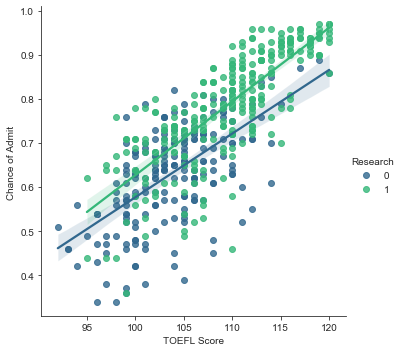

<Figure size 720x576 with 0 Axes>

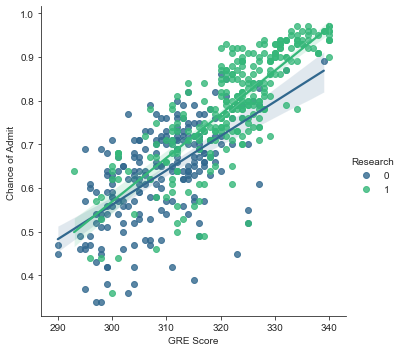

<Figure size 720x576 with 0 Axes>

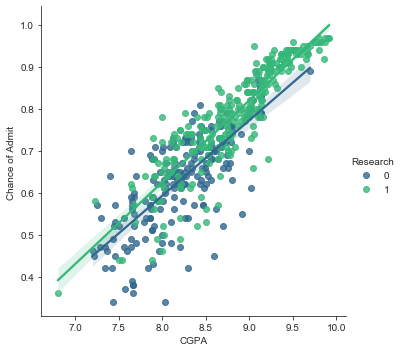

In [ ]:
for i in df[['TOEFL Score','GRE Score','CGPA']]:
    fig = plt.figure(figsize=(10, 8))
    sns.lmplot(i, 'Chance of Admit ',data = df,hue ='Research',palette = 'viridis')
    plt.show()

### It is clear that Chance of Admit is varying in somewhat linearly fashion with respect to all features. We can visualize that with more options like jointplots(hex and KDEs) as follows:

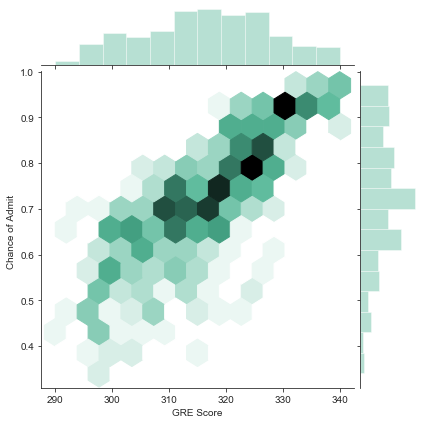

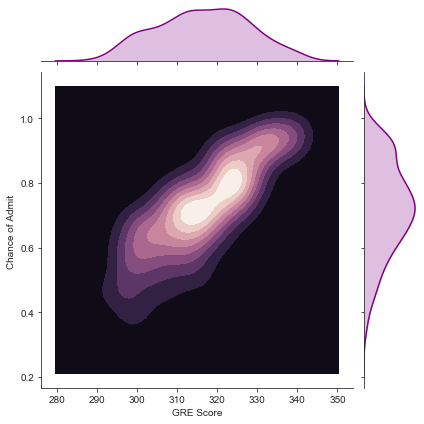

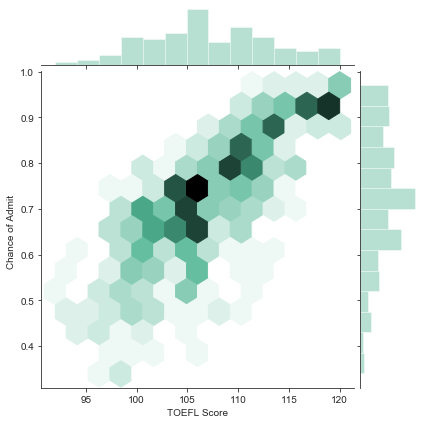

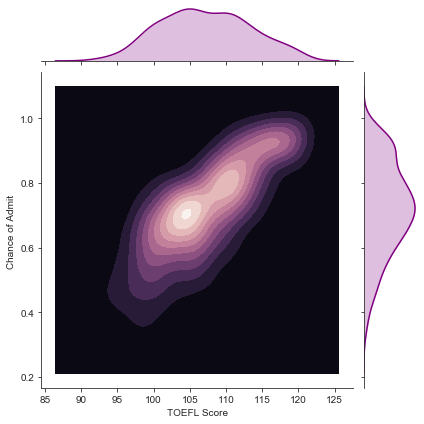

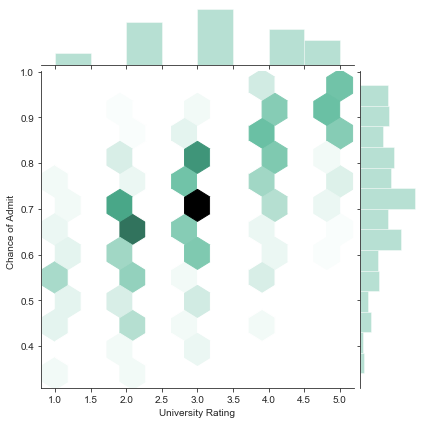

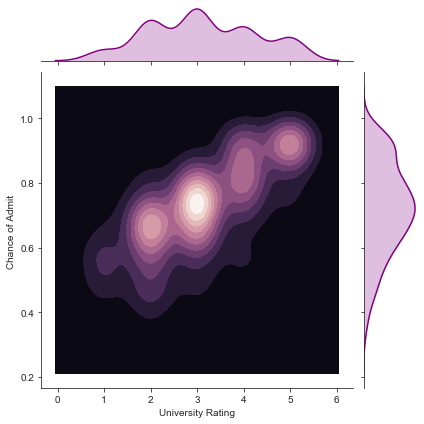

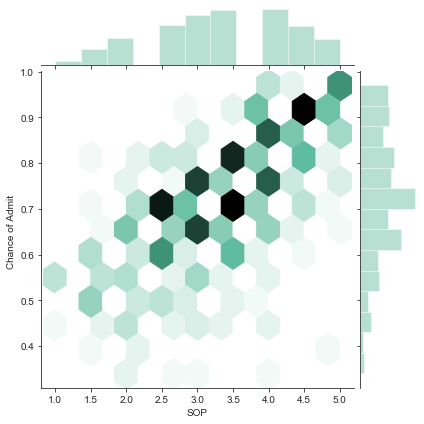

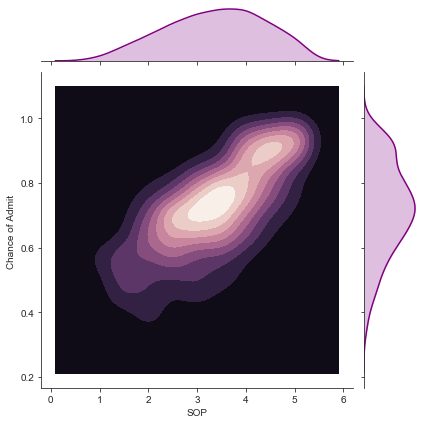

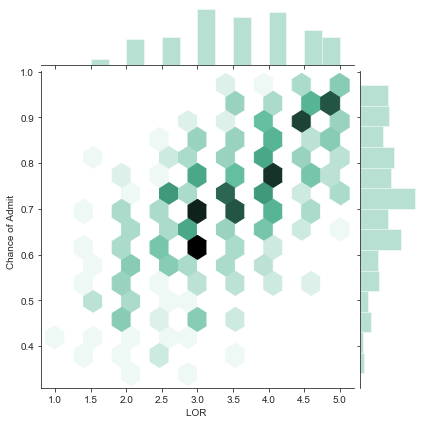

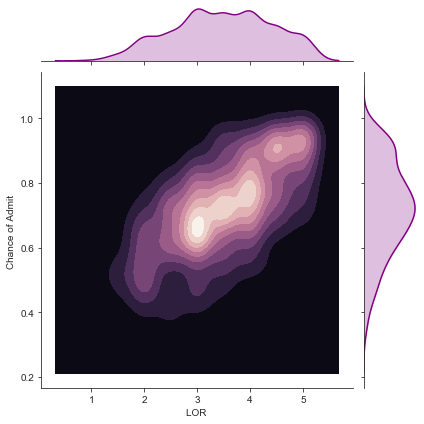

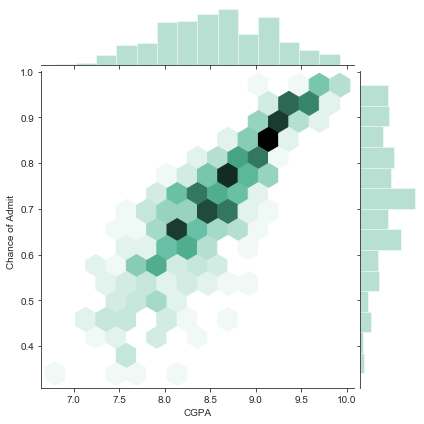

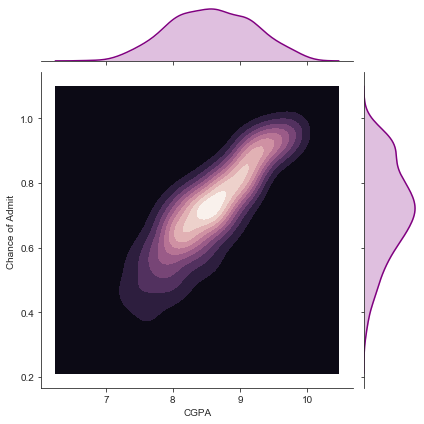

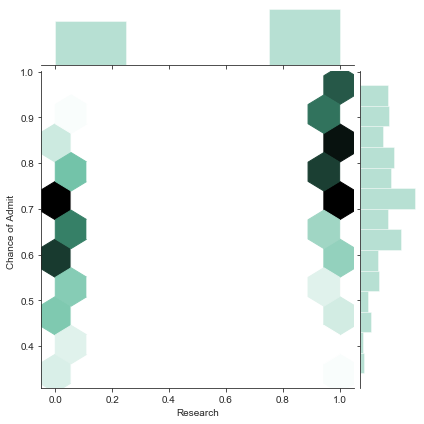

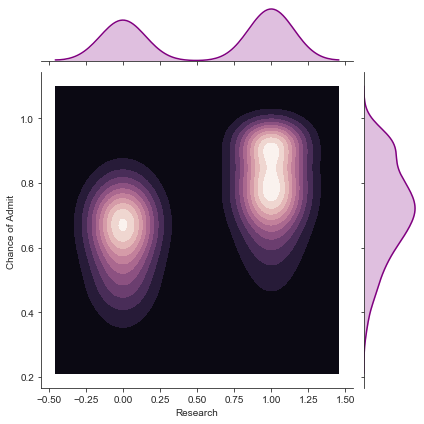

In [ ]:
for i in df.drop(['Chance of Admit '],axis =1).columns:
    sns.jointplot(df[i], 'Chance of Admit ',kind="hex", color='#4CB391', data = df, space = 0.1) 
    cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
    sns.jointplot(df[i], 'Chance of Admit ', data=df, kind="kde", color = 'purple',n_levels=10, cmap=cmap, shade = True)

### Let us look at some scatter plots...

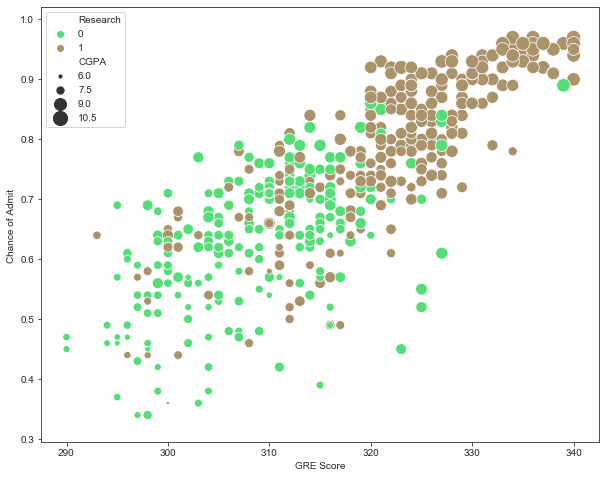

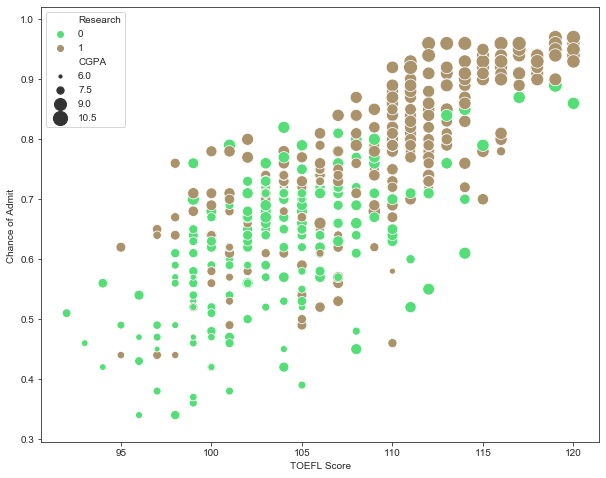

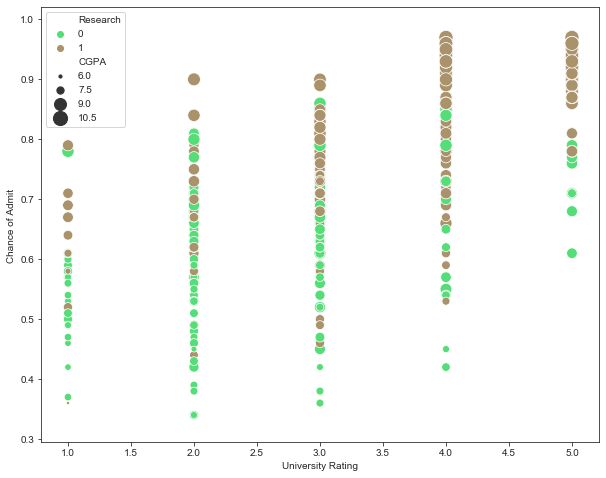

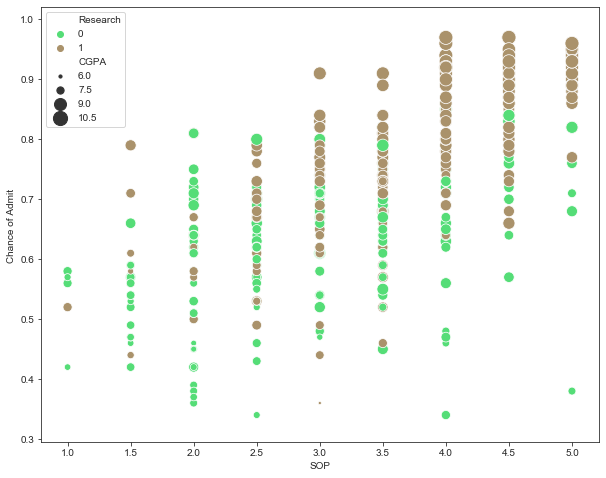

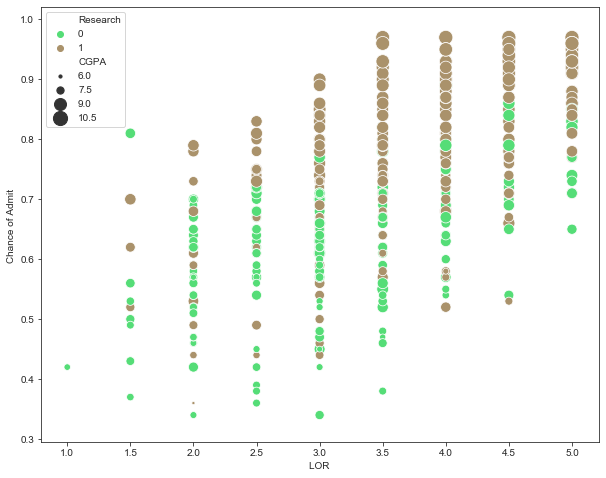

In [ ]:
for i in df.drop(['Research','Chance of Admit ','CGPA'],axis =1).columns:
    plt.figure(figsize=[10,8])
    sns.scatterplot(x=df[i], y=df['Chance of Admit '], hue = df['Research'],size=df['CGPA'],sizes=(10, 200),palette ='terrain')
    plt.show()

## Findings:
1. We can easily notice that, as the CGPA increases Chance of Admit increases (linear relation)
2. Also, candidate applied for Research Opportunities has most chances of landing a Admit.

# Preparations for Modelling:

## Let us do z-tranform:
We will perform z-tranform on 'GRE Score', 'TOEFL Score', 'CGPA'. It will scale the features with high values which reduce the time of prediction and confusion of model for prediction

where, z-tranform = (x - x.mean)/x.std

In [ ]:
for i in ['GRE Score', 'TOEFL Score', 'CGPA']:
    mean = df[i].mean()
    std = df[i].std()
    df[i] = df[i].apply(lambda x: (x-mean)/std)

Let us look at the data...

In [ ]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR       CGPA  Research  \
0   1.817417     1.777086                  4  4.5   4.5  1.775029         1   
1   0.666481    -0.031569                  4  4.0   4.5  0.485373         1   
2  -0.041788    -0.524839                  3  3.0   3.5 -0.953088         1   
3   0.489414     0.461700                  3  3.5   2.5  0.154692         1   
4  -0.218855    -0.689262                  2  2.0   3.0 -0.605873         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

#### There is no change in histograms which shows we have made. So we are good to go...

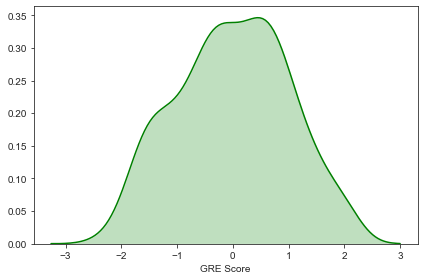

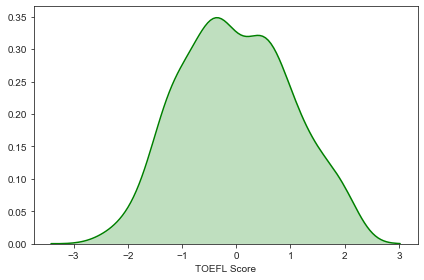

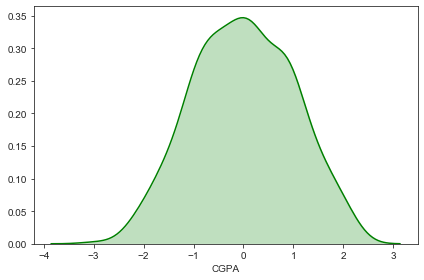

In [ ]:
for i in ['GRE Score', 'TOEFL Score', 'CGPA']:
    plt.figure(figsize =(6,4)) 
    sns.distplot(df[i], hist=False, color="green", kde = True,kde_kws={"shade": True})
    plt.tight_layout()
    plt.show()

## Let us look at summary of OLS (Ordinary Least Squares) model

In [ ]:
X_sm = sm.add_constant(df.drop(['Chance of Admit '], axis=1))
model = sm.OLS(df['Chance of Admit '],X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          8.21e-180
Time:                        21:32:23   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6255      0.017     37.511      0.000       0.593       0.658
GRE Score             0.0210      0.006      3.700      0.000       0.010       0.032
TOEFL Score           0.0169      0.005      3.184      0.002       0.006       0.027
University Rating     0.0059      0.004      1.563      0.119      -0.002       0.013
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.011
LOR                   0.0169      0.004      4.074      0.000       0.009       0.025
CGPA                  0.0716      0.006     12.198      0.000       0.060       0.083
Research              0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we can see p value is way bigger than 0.05 for 'University Rating' and 'SOP'

fyi,
https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

## Encoding:
We will be using dummy variables for features 'University Rating', 'SOP', 'LOR '. Those are not actually categorical variables but, they are representing different categories indirectly.

#### Now, let us add dummy variables inplace of  features 'University Rating', 'SOP', 'LOR '...

In [ ]:
for i in ['LOR ', 'University Rating', 'SOP']:
    dummy= pd.get_dummies(df[i], prefix = i, drop_first = True)
    df = pd.concat([df,dummy], axis= 1)
    df.drop([i],axis = 1 , inplace = True)

Let us look at the data...

In [ ]:
df.head()

GRE Score  TOEFL Score      CGPA  Research  Chance of Admit   LOR _1.5  \
0   1.817417     1.777086  1.775029         1              0.92         0   
1   0.666481    -0.031569  0.485373         1              0.76         0   
2  -0.041788    -0.524839 -0.953088         1              0.72         0   
3   0.489414     0.461700  0.154692         1              0.80         0   
4  -0.218855    -0.689262 -0.605873         0              0.65         0   

   LOR _2.0  LOR _2.5  LOR _3.0  LOR _3.5  ...  University Rating_4  \
0         0         0         0         0  ...                    1   
1         0         0         0         0  ...                    1   
2         0         0         0         1  ...                    0   
3         0         1         0         0  ...                    0   
4         0         0         1         0  ...                    0   

   University Rating_5  SOP_1.5  SOP_2.0  SOP_2.5  SOP_3.0  SOP_3.5  SOP_4.0  \
0                    0        0        0        0        0        0        0   
1                    0        0        0        0        0        0        1   
2                    0        0        0        0        1        0        0   
3                    0        0        0        0        0        1        0   
4                    0        0        1        0        0        0        0   

   SOP_4.5  SOP_5.0  
0        1        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  

[5 rows x 25 columns]

# Now, our data is ready for modelling:

First, let us split data into train(70%) and test(30%) data set

In [ ]:
y = df['Chance of Admit ']
X = df.drop(['Chance of Admit '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 1. Linear Regression:

Linear Regression Performance:
MAE: 0.04158327178827378
RMSE: 0.059728057163104614
R2_Score:  0.8068716207623425


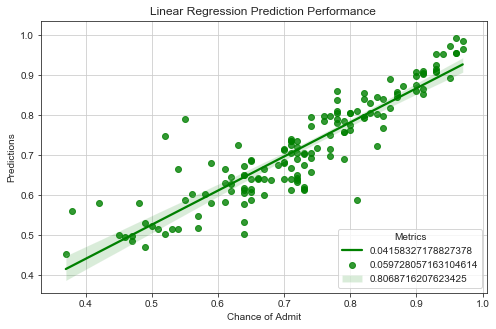

Estimated coefficients for the linear regression:  [ 0.01855316  0.01706775  0.07242219  0.02019104  0.01768856  0.05801965
  0.08617102  0.06829479  0.0892859   0.09406469  0.09256635  0.10471395
 -0.03300015 -0.02172426 -0.01154626  0.00371655  0.0012126  -0.02121266
  0.01760111  0.00735374  0.0099455   0.00771421  0.0148623   0.02491938]
Independent term:  0.6337755027056801


In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
print('Linear Regression Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, LR_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, LR_pred)))
print('R2_Score: ', metrics.r2_score(y_test, LR_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,LR_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, LR_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
R2_Score = metrics.r2_score(y_test, LR_pred)
plt.legend(title='Metrics', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()
print('Estimated coefficients for the linear regression: ',LR.coef_)
print('Independent term: ', LR.intercept_)

## 2. Ridge Regressor:

Ridge Regression Performance:
MAE: 0.04130955633778568
RMSE: 0.059339308737376945
R2_Score:  0.8093774455943222


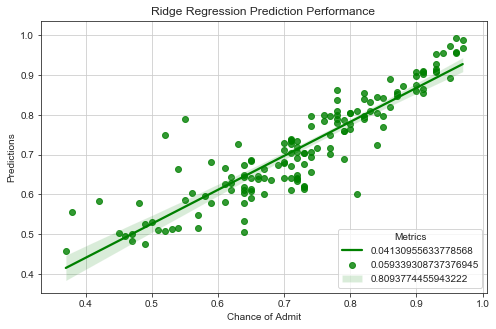

In [ ]:
RDG = Ridge()
RDG.fit(X_train,y_train)
RDG_pred = RDG.predict(X_test)
print('Ridge Regression Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, RDG_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RDG_pred)))
print('R2_Score: ', metrics.r2_score(y_test, RDG_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,RDG_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('Ridge Regression Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, RDG_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, RDG_pred))
R2_Score = metrics.r2_score(y_test, RDG_pred)
plt.legend(title='Metrics', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()

## 3. Random Forest Regressor

Random Forest Regressor Performance:
MAE: 0.04541000000000005
RMSE: 0.06012831667913771
R2_Score:  0.8042745001466493


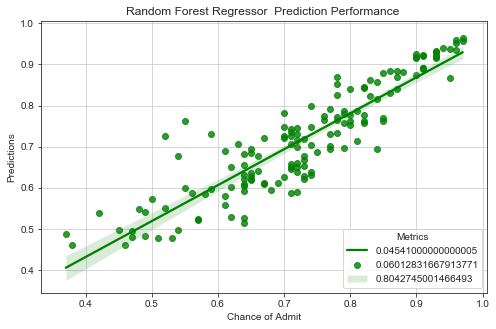

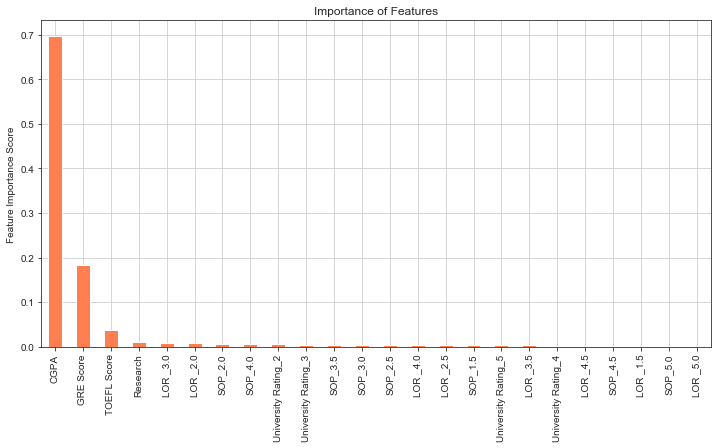

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print('Random Forest Regressor Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,rf_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('Random Forest Regressor  Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, rf_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
R2_Score = metrics.r2_score(y_test, rf_pred)
plt.legend(title='Metrics', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()
feat_imp = pd.Series(rf.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features',color = 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

#### We will do some hyper-parameter tuning to improve our model...

In [ ]:
rf_param_grid = {'max_features': ['sqrt', 'auto','log2'],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'n_estimators': [50, 100, 300, 500],
              'criterion' : ['mse','mae']}
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid, cv = 5,  n_jobs=-1)
rf_grid.fit(X_train,y_train)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

{'criterion': 'mae', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=300)


Random ForestRegressor Performance:
MAE: 0.044263000000000004
RMSE: 0.061177591621987444
R2_Score:  0.7973838440520584


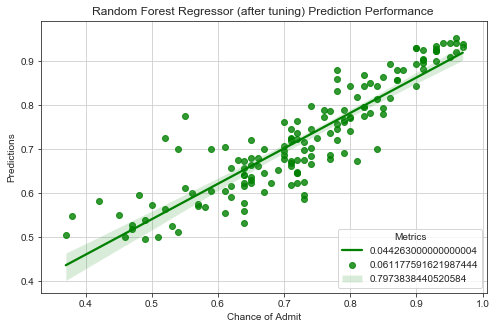

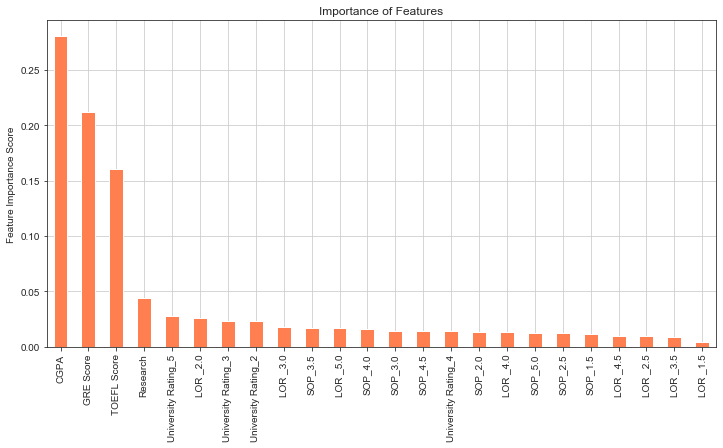

In [ ]:
rf_T = RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=100)
rf_T.fit(X_train,y_train)
rf_T_pred = rf_T.predict(X_test)
print('Random ForestRegressor Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, rf_T_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_T_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf_T_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,rf_T_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('Random Forest Regressor (after tuning) Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, rf_T_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_T_pred))
R2_Score = metrics.r2_score(y_test, rf_T_pred)
plt.legend(title='Metrics', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()
feat_imp = pd.Series(rf_T.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features',color = 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

## 4. Gradient Boosting Regressor:

Gradiant Boosting Regressor Performance:
MAE: 0.04572395027807172
RMSE: 0.062033036515289214
R2_Score:  0.7916778734589183


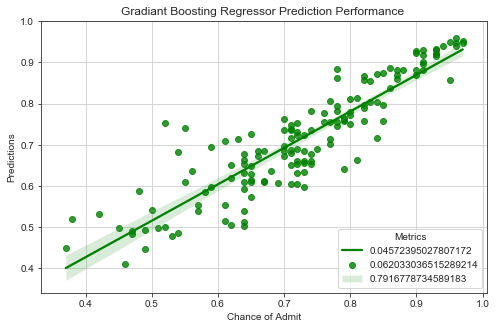

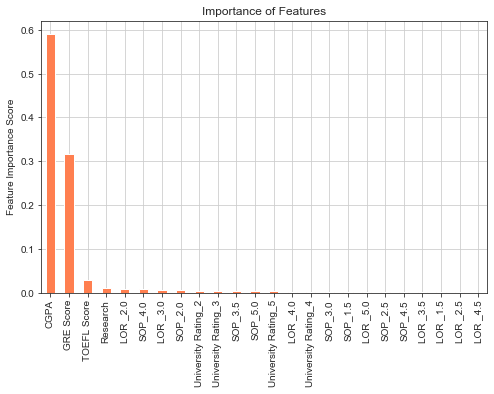

In [ ]:
GBM = GradientBoostingRegressor(n_estimators=100)
GBM.fit(X_train, y_train)
GBM_pred = GBM.predict(X_test)
print('Gradiant Boosting Regressor Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, GBM_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GBM_pred)))
print('R2_Score: ', metrics.r2_score(y_test, GBM_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,GBM_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting Regressor Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, GBM_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, GBM_pred))
R2_Score = metrics.r2_score(y_test, GBM_pred)
plt.legend(title='Metrics', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()
feat_imp = pd.Series(GBM.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(8, 5))
feat_imp.plot(kind='bar', title='Importance of Features', color ='coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

#### We will do some hyper-parameter tuning to improve our model...

In [ ]:
gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001], 
            'n_estimators':[50, 100, 300 ,500],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1], 
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}
gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,
                          cv=5)
gbm_tuning.fit(X_train,y_train)
print(gbm_tuning.best_params_)
print(gbm_tuning.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 300, 'subsample': 0.7}
GradientBoostingRegressor(learning_rate=0.01, max_features=7,
                          min_samples_split=20, n_estimators=300,
                          random_state=101, subsample=0.7)


Gradiant Boosting Regressor Performance:
MAE: 0.042651408269633186
RMSE: 0.05853084527768949
R2_Score:  0.8145363035027724


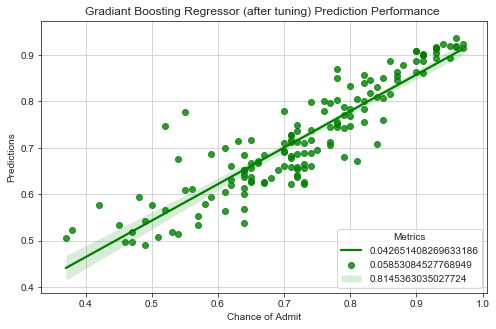

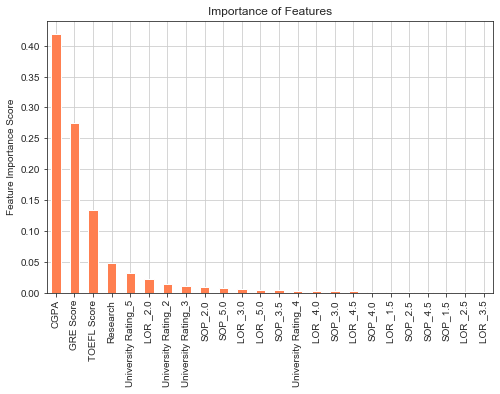

In [ ]:
GBM_T = GradientBoostingRegressor(learning_rate=0.01, max_features=7,
                          min_samples_split=20, n_estimators=300,
                          random_state=101, subsample=0.7)
GBM_T.fit(X_train, y_train)
GBM_T_pred = GBM_T.predict(X_test)
print('Gradiant Boosting Regressor Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, GBM_T_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GBM_T_pred)))
print('R2_Score: ', metrics.r2_score(y_test, GBM_T_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,GBM_T_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting Regressor (after tuning) Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, GBM_T_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, GBM_T_pred))
R2_Score = metrics.r2_score(y_test, GBM_T_pred)
plt.legend(title='Metrics', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()
feat_imp = pd.Series(GBM_T.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(8, 5))
feat_imp.plot(kind='bar', title='Importance of Features', color ='coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

## 5. XGBoost Regressor:

XGBRegressor Performance:
MAE: 0.047989486583073934
RMSE: 0.06388205441716605
R2_Score:  0.7790738785584762


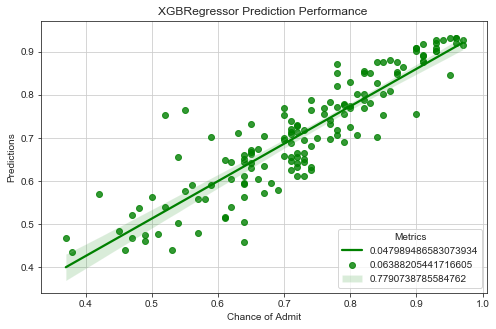

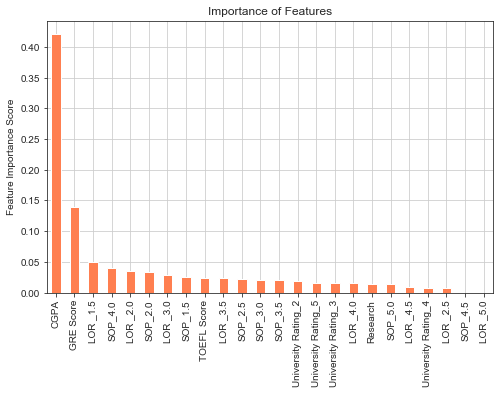

In [ ]:
xbgr = xgb.XGBRegressor(n_estimators = 10)
xbgr.fit(X_train,y_train)
xbgr_pred = xbgr.predict(X_test)
print('XGBRegressor Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, xbgr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xbgr_pred)))
print('R2_Score: ', metrics.r2_score(y_test, xbgr_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,xbgr_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('XGBRegressor Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, xbgr_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, xbgr_pred))
R2_Score = metrics.r2_score(y_test, xbgr_pred)
plt.legend(title='Metrics', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()
feat_imp = pd.Series(xbgr.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(8, 5))
feat_imp.plot(kind='bar', title='Importance of Features', color ='coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

#### We will do some hyper-parameter tuning to improve our model...

In [ ]:
params = {"learning_rate"    : [0.05,  0.15, 0.25 ],
  "max_depth"        : [ 3,  5,  8,  12 ],
  "min_child_weight" : [ 1, 3, 5, 7 ],
  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3,],
  "colsample_bytree" : [ 0.3, 0.4, 0.5 ],
  'n_estimators': [ 50, 100, 300, 500]}
xgb_tuning = GridSearchCV(estimator = xgb.XGBRegressor(random_state=101),
                          param_grid = params,
                          n_jobs=-1,
                          cv=5)
xgb_tuning.fit(X_train,y_train)
print(xgb_tuning.best_params_)
print(xgb_tuning.best_estimator_)

{'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


XGBRegressor Performance:
MAE: 0.044083502157529195
RMSE: 0.05988853525703236
R2_Score:  0.8058324270674793


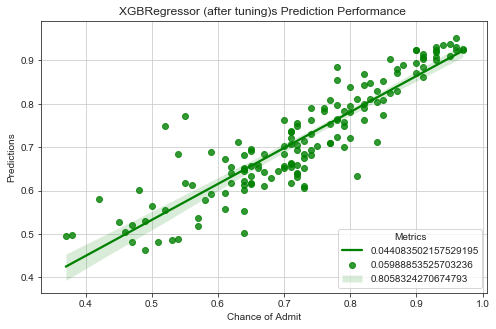

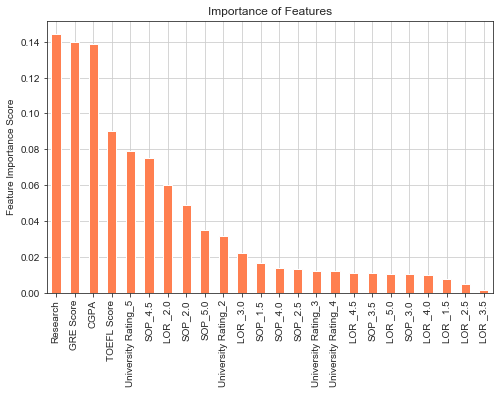

In [ ]:
xbgr_T = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xbgr_T.fit(X_train,y_train)
xbgr_T_pred = xbgr_T.predict(X_test)
print('XGBRegressor Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, xbgr_T_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xbgr_T_pred)))
print('R2_Score: ', metrics.r2_score(y_test, xbgr_T_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,xbgr_T_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('XGBRegressor (after tuning)s Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, xbgr_T_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, xbgr_T_pred))
R2_Score = metrics.r2_score(y_test, xbgr_T_pred)
plt.legend(title='Metrics', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()
feat_imp = pd.Series(xbgr_T.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(8, 5))
feat_imp.plot(kind='bar', title='Importance of Features', color ='coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

## 6. LightGBM Regressor:

LGBMRegressor Performance:
MAE: 0.045396826268612835
RMSE: 0.06257550083319408
R2_Score:  0.7880184868521609


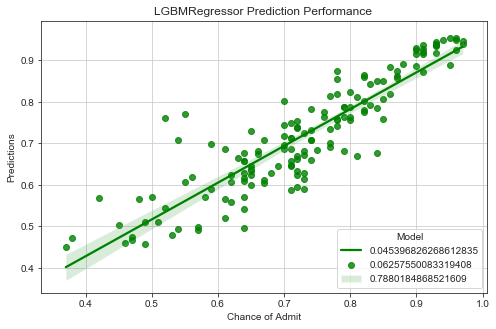

In [ ]:
lgbr = lgb.LGBMRegressor(n_estimators = 100)
lgbr.fit(X_train, y_train)
lgbr_pred = lgbr.predict(X_test)
print('LGBMRegressor Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, lgbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgbr_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lgbr_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,lgbr_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('LGBMRegressor Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, lgbr_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, lgbr_pred))
R2_Score = metrics.r2_score(y_test, lgbr_pred)
plt.legend(title='Model', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()

#### We will do some hyper-parameter tuning to improve our model...

In [ ]:
from sklearn.model_selection import KFold
gkf = KFold(n_splits=5, shuffle=True, random_state=101).split(X=X_train, y=y_train)
param_grid = {
    'num_leaves': [50, 100, 300, 500],
    'n_estimators':[50, 100, 300, 500],
    'reg_alpha': [0.1, 0.3, 0.5],
    'min_data_in_leaf': [50, 100, 300],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }
lgb_estimator = lgb.LGBMRegressor(boosting_type='gbdt',  objective='binary', num_boost_round=2000,
                                  learning_rate=0.01, metric='auc')
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X_train,y_train)
print(lgb_model.best_params_)
print(lgb_model.best_estimator_)

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.

{'lambda_l1': 0, 'lambda_l2': 0, 'min_data_in_leaf': 50, 'n_estimators': 50, 'num_leaves': 50, 'reg_alpha': 0.1}
LGBMRegressor(lambda_l1=0, lambda_l2=0, learning_rate=0.01, metric='auc',
              min_data_in_leaf=50, n_estimators=50, num_boost_round=2000,
              num_leaves=50, objective='binary', reg_alpha=0.1)


C:\Users\Balaji\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor Performance:
MAE: 0.044527047260507095
RMSE: 0.06078326243693519
R2_Score:  0.7999874106882082


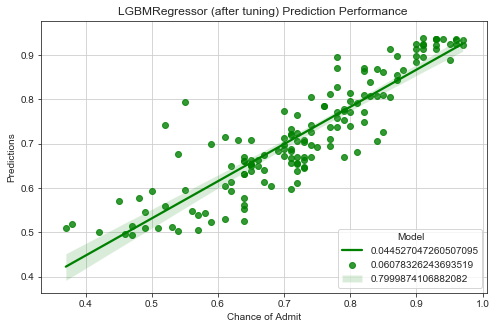

In [ ]:
lgbr_T = lgb.LGBMRegressor(lambda_l1=0, lambda_l2=0, learning_rate=0.01, metric='auc',
              min_data_in_leaf=50, n_estimators=50, num_boost_round=2000,
              num_leaves=50, reg_alpha=0.1)
lgbr_T.fit(X_train, y_train)
lgbr_T_pred = lgbr_T.predict(X_test)
print('LGBMRegressor Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, lgbr_T_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgbr_T_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lgbr_T_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,lgbr_T_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('LGBMRegressor (after tuning) Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, lgbr_T_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, lgbr_T_pred))
R2_Score = metrics.r2_score(y_test, lgbr_T_pred)
plt.legend(title='Model', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()

## 7. CATBoost Regressor:

Learning rate set to 0.059402
0:	learn: 0.1376120	total: 2.66ms	remaining: 1.2s
1:	learn: 0.1324893	total: 4ms	remaining: 895ms
2:	learn: 0.1275406	total: 5.28ms	remaining: 787ms
3:	learn: 0.1232240	total: 6.57ms	remaining: 733ms
4:	learn: 0.1187759	total: 7.83ms	remaining: 697ms
5:	learn: 0.1148493	total: 9.17ms	remaining: 678ms
6:	learn: 0.1111249	total: 10.6ms	remaining: 668ms
7:	learn: 0.1075619	total: 11.9ms	remaining: 656ms
8:	learn: 0.1041165	total: 13.3ms	remaining: 650ms
9:	learn: 0.1011412	total: 14.6ms	remaining: 641ms
10:	learn: 0.0983626	total: 15.8ms	remaining: 631ms
11:	learn: 0.0954820	total: 17.1ms	remaining: 623ms
12:	learn: 0.0927429	total: 18.4ms	remaining: 617ms
13:	learn: 0.0903281	total: 19ms	remaining: 593ms
14:	learn: 0.0879117	total: 20.4ms	remaining: 592ms
15:	learn: 0.0856271	total: 21.8ms	remaining: 591ms
16:	learn: 0.0834146	total: 22.8ms	remaining: 581ms
17:	learn: 0.0814525	total: 23.8ms	remaining: 572ms
18:	learn: 0.0795820	total: 25ms	remaining: 567ms


243:	learn: 0.0343639	total: 289ms	remaining: 244ms
244:	learn: 0.0342967	total: 290ms	remaining: 243ms
245:	learn: 0.0342811	total: 292ms	remaining: 242ms
246:	learn: 0.0342020	total: 293ms	remaining: 241ms
247:	learn: 0.0341055	total: 294ms	remaining: 239ms
248:	learn: 0.0340509	total: 295ms	remaining: 238ms
249:	learn: 0.0339109	total: 296ms	remaining: 237ms
250:	learn: 0.0338998	total: 297ms	remaining: 236ms
251:	learn: 0.0338618	total: 298ms	remaining: 234ms
252:	learn: 0.0338354	total: 299ms	remaining: 233ms
253:	learn: 0.0337986	total: 300ms	remaining: 232ms
254:	learn: 0.0337599	total: 301ms	remaining: 231ms
255:	learn: 0.0337502	total: 303ms	remaining: 229ms
256:	learn: 0.0337306	total: 304ms	remaining: 228ms
257:	learn: 0.0336673	total: 305ms	remaining: 227ms
258:	learn: 0.0335873	total: 306ms	remaining: 226ms
259:	learn: 0.0334557	total: 308ms	remaining: 225ms
260:	learn: 0.0333674	total: 309ms	remaining: 224ms
261:	learn: 0.0332877	total: 310ms	remaining: 222ms
262:	learn: 

CatBoostRegressor Performance:
MAE: 0.04358294375851349
RMSE: 0.06010682317989839
R2_Score:  0.8044144034144416


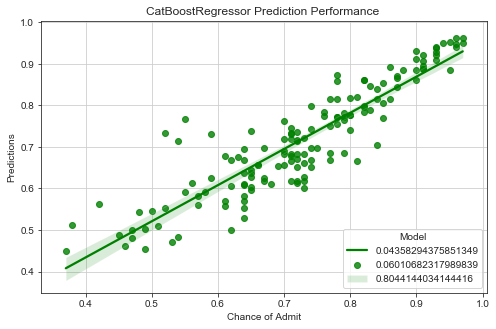

In [ ]:
cbr = cb.CatBoostRegressor(n_estimators=450)
cbr.fit(X_train, y_train)
cbr_pred = cbr.predict(X_test)
print('CatBoostRegressor Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, cbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, cbr_pred)))
print('R2_Score: ', metrics.r2_score(y_test, cbr_pred))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,cbr_pred,color='g')
plt.xlabel('Chance of Admit') 
plt.ylabel('Predictions') 
plt.title('CatBoostRegressor Prediction Performance ')  
plt.grid()
MAE = metrics.mean_absolute_error(y_test, cbr_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, cbr_pred))
R2_Score = metrics.r2_score(y_test, cbr_pred)
plt.legend(title='Model', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.show()

## Findings:
1. We can easily notice that we got highest accuracy with Gradiend Boosting Regressor (after tuning) with following accuracy:

    Mean Absolute Error (MAE): 0.042651408269633186
    
    Root Mean Squared Error (RMSE): 0.05853084527768949
    
    R2_Score:  0.8145363035027724


2. Also, all models have R2_Score of around 0.8


3. Following are the Results:

# Evaluation:

In [ ]:
Models = ['Linear Regression', 'Ridge Regression', 'Random Forest Regressor', 'Gradiant Boosting Regressor',
          'XGBoost Regressor', 'LightGBM Regressor', 'CatBoost Regressor']
MAEs = [0.04158327178827378, 0.04130955633778568, 0.04541000000000005, 0.042651408269633186,
        0.044083502157529195, 0.044527047260507095, 0.04358294375851349]
R2_Scores = [0.8068716207623425, 0.8093774455943222, 0.8042745001466493, 0.8145363035027724,  0.8058324270674793,
             0.7999874106882082, 0.8044144034144416]
RMSEs = [0.059728057163104614,  0.059339308737376945, 0.06012831667913771, 0.05853084527768949, 0.05988853525703236, 
         0.06078326243693519, 0.06010682317989839]

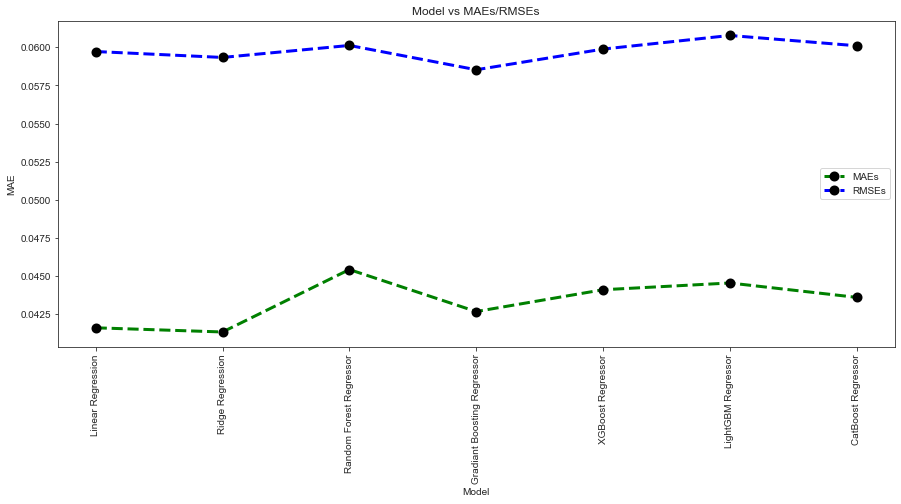

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.plot(Models, MAEs, 'o', color='g',
          markersize=5, linewidth=3,
          markerfacecolor='gray',
          markeredgecolor='k',
          markeredgewidth=5, ls='--', label='MAEs')
plt.plot(Models, RMSEs, 'o', color='b',
          markersize=5, linewidth=3,
          markerfacecolor='gray',
          markeredgecolor='k',
          markeredgewidth=5, ls='--', label='RMSEs')
plt.xlabel('Model') 
plt.xticks( rotation=90)
plt.ylabel('MAE') 
plt.title('Model vs MAEs/RMSEs') 
plt.legend( loc='center right')
plt.show()

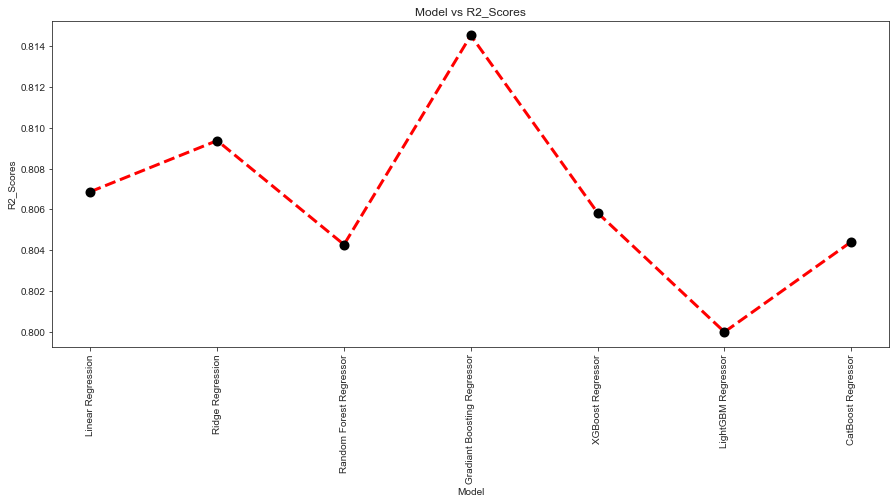

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.plot(Models, R2_Scores, 'o', color='red',
          markersize=5, linewidth=3,
          markerfacecolor='gray',
          markeredgecolor='k',
          markeredgewidth=5, ls='--')
plt.xlabel('Model') 
plt.xticks( rotation=90)
plt.ylabel('R2_Scores') 
plt.title('Model vs R2_Scores') 
plt.show()

Final Graph of Actual vs Average Prediction: 
Final Performance:
MAE: 0.04105450645496559
RMSE: 0.05741317550179189
R2_Score:  0.821551683228016


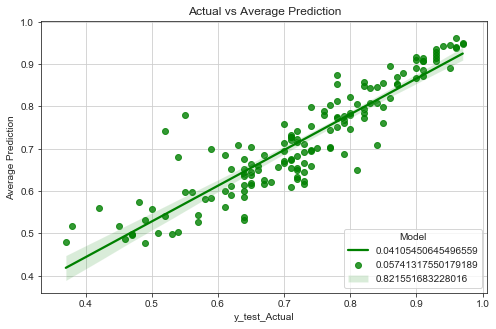

In [ ]:
print('Final Graph of Actual vs Average Prediction: ')
preds = (LR_pred+RDG_pred+rf_pred+GBM_T_pred+xbgr_T_pred+lgbr_T_pred+cbr_pred)/7
print('Final Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2_Score: ', metrics.r2_score(y_test, preds))
fig = plt.figure(figsize=(8, 5))
sns.regplot(y_test,preds,color='g')
plt.xlabel('y_test_Actual') 
plt.ylabel('Average Prediction') 
plt.title('Actual vs Average Prediction')  
MAE = metrics.mean_absolute_error(y_test, preds)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, preds))
R2_Score = metrics.r2_score(y_test, preds)
plt.legend(title='Model', loc='lower right', labels=[MAE,RMSE,R2_Score])
plt.grid()
plt.show()

In [ ]:
print('Average Mean Absolute Error is {}'.format(round(metrics.mean_absolute_error(y_test, preds),6)))
print('Average Root Mean Squared Error is {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, preds)),6)))
print('Average prediction accuracy(R2_Score) is {}%'.format(round(metrics.r2_score(y_test, preds)*100,2)))

Average Mean Absolute Error is 0.041055
Average Root Mean Squared Error is 0.057413
Average prediction accuracy(R2_Score) is 82.16%


# CASE STUDY:

In [ ]:
GRE = []
TOEFL = []
UR = []
SOP = []
LOR = []
CGPA = []
Research = []

for i in range(0,500):
    GRE.append(random.choice(range(295,341,1)))
    TOEFL.append(random.choice(range(90,121,1)))
    UR.append(random.choice(range(1,6,1)))
    SOP.append(random.choice(range(10,55,5))/10)
    LOR.append(random.choice(range(10,55,5))/10)
    CGPA.append(round(random.uniform(7.5,10.1),2))
    Research.append(random.choice(range(0,2,1)))
    

df_cs = pd.DataFrame(list(zip(GRE, TOEFL, UR, SOP ,LOR, CGPA, Research)), 
                columns =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']) 
for i in ['LOR ', 'University Rating', 'SOP']:
    dummy2 = pd.get_dummies(df_cs[i], prefix = i, drop_first = True)
    df_cs = pd.concat([df_cs,dummy], axis= 1)
    df_cs.drop([i],axis = 1 , inplace = True)
df_cs.head()

GRE Score  TOEFL Score  CGPA  Research  SOP_1.5  SOP_2.0  SOP_2.5  SOP_3.0  \
0        338           92  9.40         1        0        0        0        0   
1        326          104  7.63         0        0        0        0        0   
2        297          120  8.21         1        0        0        0        1   
3        332          108  8.56         1        0        0        0        0   
4        327           95  8.76         0        0        1        0        0   

   SOP_3.5  SOP_4.0  ...  SOP_4.5  SOP_5.0  SOP_1.5  SOP_2.0  SOP_2.5  \
0        0        0  ...        1        0        0        0        0   
1        0        1  ...        0        0        0        0        0   
2        0        0  ...        0        0        0        0        0   
3        1        0  ...        0        0        0        0        0   
4        0        0  ...        0        0        0        1        0   

   SOP_3.0  SOP_3.5  SOP_4.0  SOP_4.5  SOP_5.0  
0        0        0        0        1        0  
1        0        0        1        0        0  
2        1        0        0        0        0  
3        0        1        0        0        0  
4        0        0        0        0        0  

[5 rows x 28 columns]

In [ ]:
results = pd.DataFrame(list(zip(LR.predict(X_test),RDG.predict(X_test),rf.predict(X_test),GBM_T.predict(X_test),
                                     xbgr_T.predict(X_test),lgbr_T.predict(X_test),cbr.predict(X_test),Chance_of_Admit_cs)), 
                columns =['Linear Regression', 'Ridge Regression', 'Random Forest Regressor', 'Gradiant Boosting Regressor',
                          'XGBoost Regressor', 'LightGBM Regressor', 'CatBoost Regressor', 'Average of All']) 
results.head()

Linear Regression  Ridge Regression  Random Forest Regressor  \
0           0.725220          0.726123                   0.7058   
1           0.908309          0.909406                   0.9227   
2           0.796331          0.797536                   0.7988   
3           0.588154          0.590296                   0.6196   
4           0.640128          0.642359                   0.7249   

   Gradiant Boosting Regressor  XGBoost Regressor  LightGBM Regressor  \
0                     0.715040           0.711222            0.706976   
1                     0.904406           0.907962            0.923187   
2                     0.799020           0.790349            0.806103   
3                     0.628233           0.618432            0.654312   
4                     0.661561           0.651028            0.687196   

   CatBoost Regressor  Average of All  
0            0.675933        0.709474  
1            0.928840        0.914973  
2            0.798223        0.798052  
3            0.603601        0.614661  
4            0.684120        0.670185

In [ ]:
df_cs = pd.concat([df_cs,results], axis =1)
df_cs.head()

GRE Score  TOEFL Score  CGPA  Research  SOP_1.5  SOP_2.0  SOP_2.5  SOP_3.0  \
0      327.0         97.0  7.79       1.0        0        0        0        0   
1      327.0        118.0  7.97       0.0        0        0        0        0   
2      326.0        117.0  8.66       1.0        0        0        0        1   
3      298.0        104.0  8.06       0.0        0        0        0        0   
4      339.0        107.0  9.33       1.0        0        1        0        0   

   SOP_3.5  SOP_4.0  ...  SOP_4.5  SOP_5.0  Linear Regression  \
0        0        0  ...        1        0           0.725220   
1        0        1  ...        0        0           0.908309   
2        0        0  ...        0        0           0.796331   
3        1        0  ...        0        0           0.588154   
4        0        0  ...        0        0           0.640128   

   Ridge Regression  Random Forest Regressor  Gradiant Boosting Regressor  \
0          0.726123                   0.7058                     0.715040   
1          0.909406                   0.9227                     0.904406   
2          0.797536                   0.7988                     0.799020   
3          0.590296                   0.6196                     0.628233   
4          0.642359                   0.7249                     0.661561   

   XGBoost Regressor  LightGBM Regressor  CatBoost Regressor  Average of All  
0           0.711222            0.706976            0.675933        0.709474  
1           0.907962            0.923187            0.928840        0.914973  
2           0.790349            0.806103            0.798223        0.798052  
3           0.618432            0.654312            0.603601        0.614661  
4           0.651028            0.687196            0.684120        0.670185  

[5 rows x 36 columns]

In [ ]:
df_cs.to_csv('/datasets_14872_228180_Admission_Predict_Ver1.1/CaseStudy.csv')

In [ ]:
import pickle

file = open('Model.pkl','wb')

pickle.dump(GBM_T, file)